In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import pickle

In [146]:
df = pd.read_csv('car_prices.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512791 entries, 0 to 512790
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          512791 non-null  int64  
 1   make          512791 non-null  object 
 2   model         512791 non-null  object 
 3   trim          512791 non-null  object 
 4   body          512791 non-null  object 
 5   transmission  512791 non-null  object 
 6   vin           512791 non-null  object 
 7   state         512791 non-null  object 
 8   condition     512791 non-null  int64  
 9   odometer      512791 non-null  float64
 10  color         512791 non-null  object 
 11  interior      512791 non-null  object 
 12  seller        512791 non-null  object 
 13  mmr           512791 non-null  float64
 14  sellingprice  512791 non-null  float64
 15  saledate      512791 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 62.6+ MB


In [5]:
df.shape

(512791, 16)

In [6]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,California,5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,California,5,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,California,1,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [8]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition         int64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [139]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,512791.000000,512791.000000,512791.000000,512791.000000,512791.000000
mean,2010.161892,3.569563,65298.642751,13071.410477,12916.098459
std,3.784217,1.299893,46323.787564,7546.976871,7686.285658
min,1989.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,3.000000,28755.000000,7450.000000,7200.000000
50%,2012.000000,4.000000,51763.000000,12250.000000,12100.000000
75%,2013.000000,5.000000,96378.500000,17750.000000,17700.000000
max,2015.000000,5.000000,202512.000000,34800.000000,230000.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df1 = df.isnull().sum()
df1

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [13]:
print(df['condition'])

0         1
1         1
2         5
3         5
4         1
         ..
512786    4
512787    1
512788    5
512789    4
512790    4
Name: condition, Length: 512791, dtype: int64


In [14]:
df['condition'] = df['condition'].fillna(df['condition'].mean())
bins = [0, 10, 20, 30, 40, 50]
labels = [1, 2, 3, 4, 5]

df['condition'] = pd.cut(df['condition'], bins=bins, labels=labels, right=True, include_lowest=True)

df['condition'] = df['condition'].astype(int)

In [15]:
print(df['condition'])

0         1
1         1
2         1
3         1
4         1
         ..
512786    1
512787    1
512788    1
512789    1
512790    1
Name: condition, Length: 512791, dtype: int32


In [16]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [17]:
df['make'] = df['make'].fillna(df['make'].mode()[0])
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['body'] = df['body'].fillna(df['body'].mode()[0])

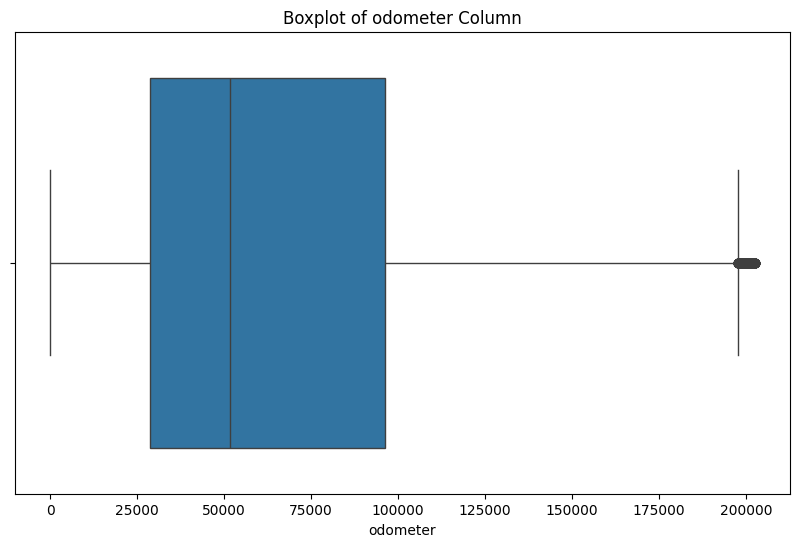

In [19]:

# Create the boxplot for the 'condition' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of odometer Column')
plt.xlabel('odometer')
plt.show()


In [21]:
q1 = df.odometer.quantile(0.25)
q3 = df.odometer.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df = df[(df.odometer >= lower_limit) & (df.odometer <= upper_limit)]

In [23]:
q1 = df.mmr.quantile(0.25)
q3 = df.mmr.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df = df[(df.mmr >= lower_limit) & (df.mmr <= upper_limit)]

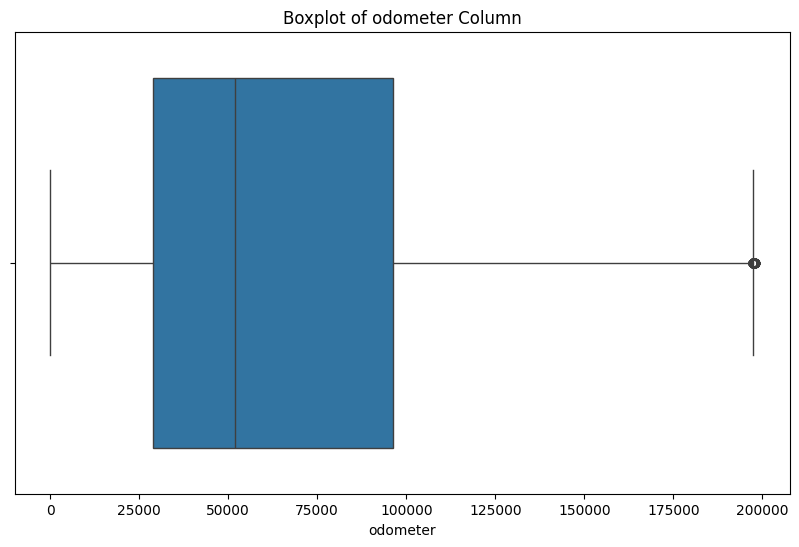

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of odometer Column')
plt.xlabel('odometer')
plt.show()

In [27]:
df['transmission'] = df['transmission'].replace(to_replace = 'Sedan', value = 'automatic')
df['body'] = df['body'].replace(to_replace = 'suv', value = 'SUV')

In [29]:
make_replacement = {
    'chev truck': 'Chevrolet',
    'dodge tk': 'Dodge',
    'gmc truck': 'GMC',
    'hyundai tk': 'Hyundai',
    'landrover': 'Land Rover',
    'mazda tk': 'Mazda',
    'mercedes': 'Mercedes-Benz',
    'mercedes-b': 'Mercedes-Benz',
    'ford tk': 'Ford',
    'ford truck': 'Ford',
    'vw': 'Volkswagen'
}
df['make'] = df['make'].replace(make_replacement)

In [31]:
"""states_to_keep = ['al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',
                  'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'nj', 'nm', 'nv',
                  'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'qe', 'sc', 'tn', 'tx',
                  'ut', 'va', 'wa', 'wi']
df = df[df['state'].isin(states_to_keep)]
state_dict = {
    'al': 'Alabama',
    'az': 'Arizona',
    'ca': 'California',
    'co': 'Colorado',
    'fl': 'Florida',
    'ga': 'Georgia',
    'hi': 'Hawaii',
    'il': 'Illinois',
    'in': 'Indiana',
    'la': 'Louisiana',
    'ma': 'Massachusetts',
    'md': 'Maryland',
    'mi': 'Michigan',
    'mn': 'Minnesota',
    'mo': 'Missouri',
    'ms': 'Mississippi',
    'nc': 'North Carolina',
    'nj': 'New Jersey',
    'nm': 'New Mexico',
    'nv': 'Nevada',
    'ny': 'New York',
    'oh': 'Ohio',
    'ok': 'Oklahoma',
    'on': 'Ontario',
    'or': 'Oregon',
    'pa': 'Pennsylvania',
    'pr': 'Puerto Rico',
    'qe': 'Quebec',
    'sc': 'South Carolina',
    'tn': 'Tennessee',
    'tx': 'Texas',
    'ut': 'Utah',
    'va': 'Virginia',
    'wa': 'Washington',
    'wi': 'Wisconsin'
}
df['state'] = df['state'].replace(state_dict)"""

"states_to_keep = ['al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',\n                  'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'nj', 'nm', 'nv',\n                  'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'qe', 'sc', 'tn', 'tx',\n                  'ut', 'va', 'wa', 'wi']\ndf = df[df['state'].isin(states_to_keep)]\nstate_dict = {\n    'al': 'Alabama',\n    'az': 'Arizona',\n    'ca': 'California',\n    'co': 'Colorado',\n    'fl': 'Florida',\n    'ga': 'Georgia',\n    'hi': 'Hawaii',\n    'il': 'Illinois',\n    'in': 'Indiana',\n    'la': 'Louisiana',\n    'ma': 'Massachusetts',\n    'md': 'Maryland',\n    'mi': 'Michigan',\n    'mn': 'Minnesota',\n    'mo': 'Missouri',\n    'ms': 'Mississippi',\n    'nc': 'North Carolina',\n    'nj': 'New Jersey',\n    'nm': 'New Mexico',\n    'nv': 'Nevada',\n    'ny': 'New York',\n    'oh': 'Ohio',\n    'ok': 'Oklahoma',\n    'on': 'Ontario',\n    'or': 'Oregon',\n    'pa': 'Pennsylvania',\n    'pr': 'Puerto Rico',\n    'qe': 'Quebec',\n    '

#DATA VISUALIZATION

In [34]:
df_usstate = df.groupby('state')['sellingprice'].mean().head(15)

df_usstate

state
Alabama           9440.000000
Arizona          11164.200682
California       12943.678350
Colorado         14989.972008
Florida          13082.792149
Georgia          12262.439586
Hawaii           11997.670549
Illinois         14297.537484
Indiana          10779.315298
Louisiana        10457.764562
Maryland          7716.590010
Massachusetts     6903.174411
Michigan         14480.258953
Minnesota        13427.667261
Mississippi      11063.864416
Name: sellingprice, dtype: float64

In [35]:
MAKE_PRICE = df.groupby('make')['sellingprice'].mean().head(15)

MAKE_PRICE

make
Acura        14132.190407
Audi         15431.180470
BMW          16439.040206
Buick        10636.497934
Cadillac     13100.688439
Chevrolet    11237.762228
Chrysler     10863.559211
Daewoo         400.000000
Dodge        11059.638698
FIAT          9946.722293
Ford         14110.888658
GMC          15930.100011
Geo            588.461538
HUMMER       15143.863402
Honda        11439.088529
Name: sellingprice, dtype: float64

In [36]:
typeofcar = df.groupby('body')['sellingprice'].mean().head(15)

typeofcar

body
Access Cab            14152.857143
Beetle Convertible    18070.192308
CTS Coupe             22758.527132
CTS Wagon             17811.538462
CTS-V Coupe           30500.000000
Cab Plus               2300.000000
Cab Plus 4             8680.000000
Club Cab               4767.181208
Convertible           13042.902860
Coupe                 12683.141099
Crew Cab              18805.979931
CrewMax Cab           23342.307692
Double Cab            22959.989336
E-Series Van          19236.373864
Elantra Coupe         12337.341772
Name: sellingprice, dtype: float64

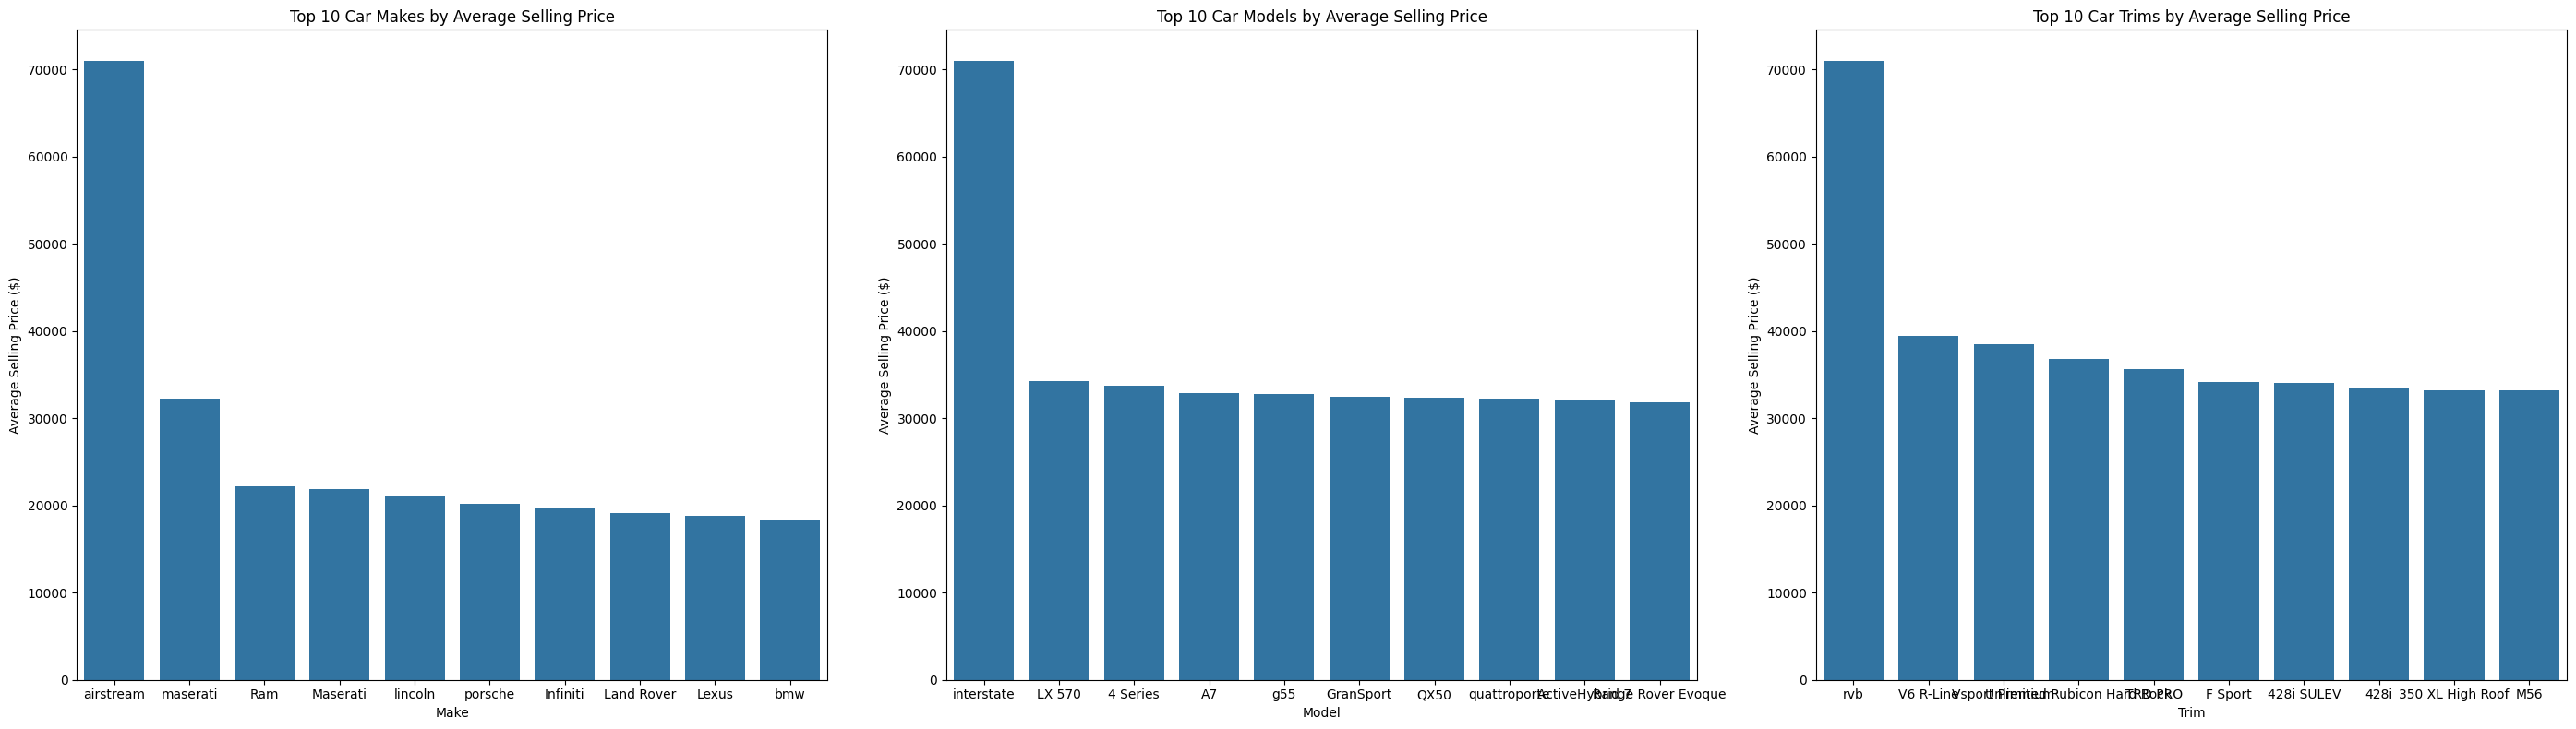

In [37]:
df_avg_make = df.groupby('make')['sellingprice'].mean().reset_index()
df_avg_model = df.groupby('model')['sellingprice'].mean().reset_index()
df_avg_trim = df.groupby('trim')['sellingprice'].mean().reset_index()


df_avg_make = df_avg_make.sort_values(by='sellingprice', ascending=False).head(10)
df_avg_model = df_avg_model.sort_values(by='sellingprice', ascending=False).head(10)
df_avg_trim = df_avg_trim.sort_values(by='sellingprice', ascending=False).head(10)

#Plotting subplots for make, model, and trim
plt.figure(figsize=(28, 8))

#Top 10 Car Makes by Average Selling Price
plt.subplot(1, 3, 1)
sns.barplot(x='make', y='sellingprice', data=df_avg_make)
plt.title('Top 10 Car Makes by Average Selling Price')
plt.xlabel('Make')
plt.ylabel('Average Selling Price ($)')

#Top 10 Car Models by Average Selling Price
plt.subplot(1, 3, 2)
sns.barplot(x='model', y='sellingprice', data=df_avg_model)
plt.title('Top 10 Car Models by Average Selling Price')
plt.xlabel('Model')
plt.ylabel('Average Selling Price ($)')

#Top 10 Car Trims by Average Selling Price
plt.subplot(1, 3, 3)
sns.barplot(x='trim', y='sellingprice', data=df_avg_trim)
plt.title('Top 10 Car Trims by Average Selling Price')
plt.xlabel('Trim')
plt.ylabel('Average Selling Price ($)')

plt.tight_layout()
plt.show()

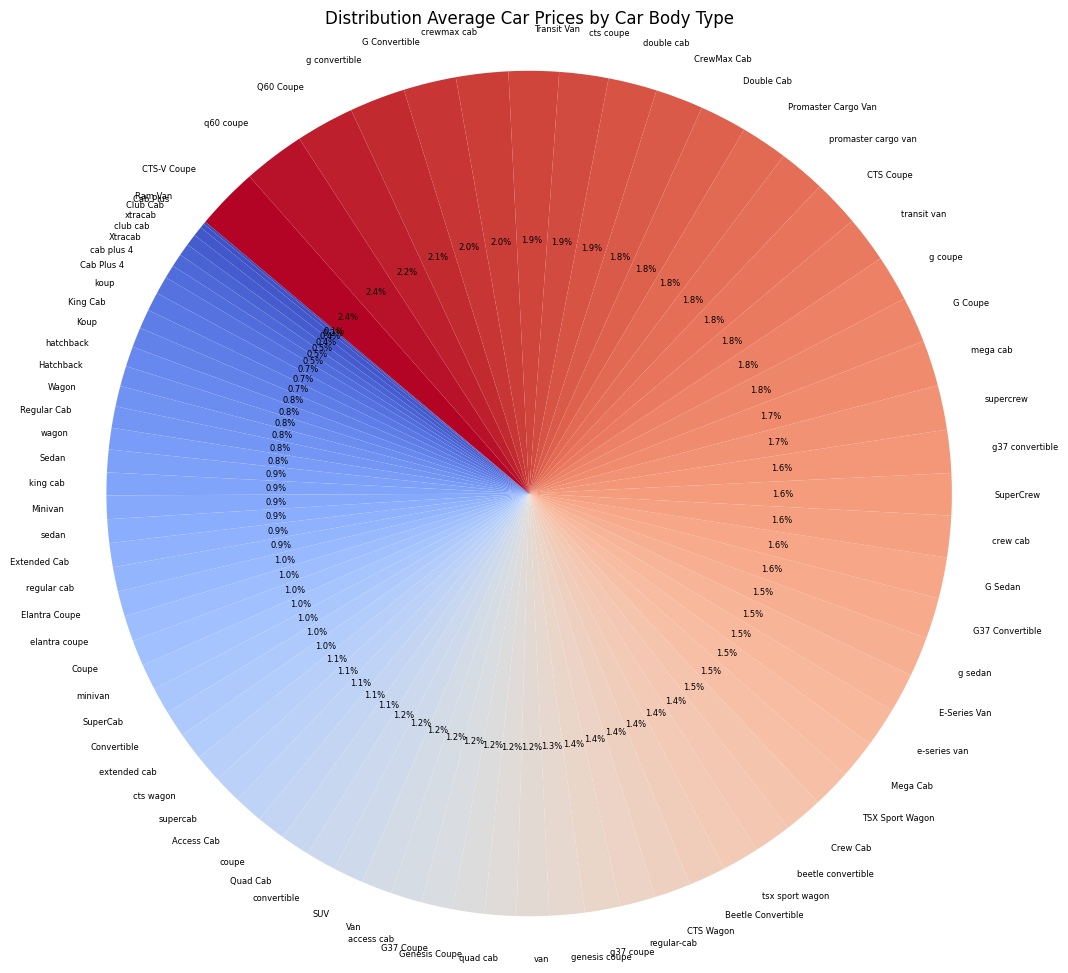

In [38]:
import numpy as np

# Average car prices by body type
car_body_price = df.groupby('body')['sellingprice'].mean().sort_values()

plt.figure(figsize=(12, 12))
colors = plt.cm.coolwarm(np.linspace(0, 1, len(car_body_price)))  

# Create pie chart
wedges, texts, autotexts = plt.pie(car_body_price, labels=car_body_price.index, autopct='%1.1f%%', startangle=140, colors=colors)


for text in texts:
    text.set_size(6)

for autotext in autotexts:
    autotext.set_size(6)

plt.title('Distribution Average Car Prices by Car Body Type')
plt.axis('equal')

plt.show()



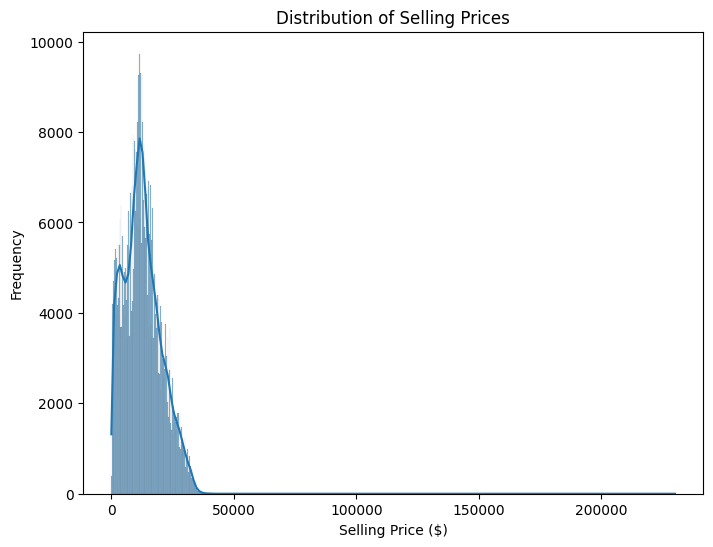

In [39]:
#Distribution of Selling Price
plt.figure(figsize=(8, 6))
sns.histplot(df['sellingprice'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price ($)')
plt.ylabel('Frequency')
plt.show()

#FEATURE ENGINEERING

In [147]:
#During the initial test it was found that the below feature didn't have much correlation with target variable. 
#Therefore removing them in the final codes

df.drop('trim', inplace= True, axis= 1)

df.drop('vin', inplace= True, axis= 1)

df.drop('interior', inplace= True, axis= 1)

df.drop('color', inplace= True, axis= 1)

df.drop('model', inplace= True, axis = 1)

df.drop('seller', inplace= True, axis = 1)

df.drop('body', inplace= True, axis = 1)

df.drop('condition', inplace= True, axis = 1)


In [41]:
#Renaming the feature names into more of a conventional naming

df_final = df.rename(columns = {'sellingprice': 'Selling Price', 'mmr': 'MMR', 'odometer': 'Odometer', 'condition': 'Condition','year': 'Make Year'})

#df.rename(columns = {'transmission_automatic': 'Is Automatic', 'transmission_manual': 'Is Manual'})

In [142]:
"""
Labeling Techniques Used:

1 OHE on Tranmission 
2 TARGET ENCODING on state & make

"""

'\nLabeling Techniques Used:\n\n1 OHE on Tranmission \n2 TARGET ENCODING on state & make\n\n'

##One Hot Encoding

In [148]:
#Doing OHE on Transmission column
df.transmission.value_counts()

transmission
automatic    496930
manual        15861
Name: count, dtype: int64

In [149]:

ohe=OneHotEncoder()

In [150]:
arry = ohe.fit_transform(df[['transmission']]).toarray()

df_ohe=pd.DataFrame(arry, columns=ohe.get_feature_names_out())
df_ohe


,transmission_automatic,transmission_manual
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
512786,1.0,0.0
512787,1.0,0.0
512788,1.0,0.0
512789,1.0,0.0


In [151]:
df_ohe.index = df.index

In [152]:
df = pd.concat([df, df_ohe], axis =1).drop(columns= 'transmission')

In [153]:
df.isnull().sum()

year                      0
make                      0
state                     0
odometer                  0
mmr                       0
sellingprice              0
saledate                  0
transmission_automatic    0
transmission_manual       0
dtype: int64

In [154]:
#Adding a feature called Is AUtomatic and assinging the value of transmission_automatic
df['Is Automatic'] = df['transmission_automatic']

In [155]:
df.head()

,year,make,state,odometer,mmr,sellingprice,saledate,transmission_automatic,transmission_manual,Is Automatic
0,2015,Kia,California,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),1.0,0.0,1.0
1,2015,Kia,California,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),1.0,0.0,1.0
2,2014,BMW,California,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1.0,0.0,1.0
3,2015,Volvo,California,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),1.0,0.0,1.0
4,2015,Nissan,California,5554.0,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),1.0,0.0,1.0


In [156]:
#Droping transmission_automatic & transmission_manual

df.drop('transmission_automatic', inplace =True, axis =1)

df.drop('transmission_manual', inplace =True, axis =1)

In [157]:
df.head()

,year,make,state,odometer,mmr,sellingprice,saledate,Is Automatic
0,2015,Kia,California,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),1.0
1,2015,Kia,California,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),1.0
2,2014,BMW,California,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),1.0
3,2015,Volvo,California,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),1.0
4,2015,Nissan,California,5554.0,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),1.0


In [158]:
df['Is Automatic'].value_counts()

Is Automatic
1.0    496930
0.0     15861
Name: count, dtype: int64

In [159]:
df.drop('saledate', inplace = True, axis = 1)

##Target Encoding

In [160]:
#TN - 1: Doing the target encoding on state
df['state'].unique()

array(['California', 'Wisconsin', 'Florida', 'New Jersey', 'Pennsylvania',
       'Nevada', 'Georgia', 'Virginia', 'North Carolina', 'Indiana',
       'Illinois', 'Tennessee', 'Minnesota', 'Michigan', 'Ohio', 'Texas',
       'Arizona', 'Colorado', 'Utah', 'Missouri', 'New York',
       'Massachusetts', 'Puerto Rico', 'South Carolina', 'Oregon',
       'Maryland', 'Louisiana', 'Washington', 'Hawaii', 'Oklahoma',
       'New Mexico', 'Mississippi', 'Alabama'], dtype=object)

In [161]:
df_usstate = df.groupby('state')['sellingprice'].mean()

df_usstate

state
Alabama            9440.000000
Arizona           11202.519690
California        13091.446174
Colorado          15126.700861
Florida           13197.440770
Georgia           12344.872645
Hawaii            12036.536868
Illinois          14400.390496
Indiana           10775.925484
Louisiana         10457.046693
Maryland           7700.423646
Massachusetts      6871.997598
Michigan          14572.311333
Minnesota         13505.603759
Mississippi       11124.179487
Missouri          14068.743501
Nevada            13837.710837
New Jersey        12787.546147
New Mexico         6433.112583
New York          11363.936295
North Carolina     8896.023260
Ohio              12985.738498
Oklahoma           7225.000000
Oregon            11354.159049
Pennsylvania      14912.549958
Puerto Rico        9563.641553
South Carolina    10340.429686
Tennessee         16293.083354
Texas             12593.587997
Utah              11816.680400
Virginia           8849.136763
Washington        13762.818261
Wi

In [162]:
df['State'] = df['state'].map(df_usstate)

df.head()

,year,make,state,odometer,mmr,sellingprice,Is Automatic,State
0,2015,Kia,California,16639.0,20500.0,21500.0,1.0,13091.446174
1,2015,Kia,California,9393.0,20800.0,21500.0,1.0,13091.446174
2,2014,BMW,California,1331.0,31900.0,30000.0,1.0,13091.446174
3,2015,Volvo,California,14282.0,27500.0,27750.0,1.0,13091.446174
4,2015,Nissan,California,5554.0,15350.0,10900.0,1.0,13091.446174


In [163]:
df.drop('state', inplace = True, axis =1)


In [164]:
df.head()

,year,make,odometer,mmr,sellingprice,Is Automatic,State
0,2015,Kia,16639.0,20500.0,21500.0,1.0,13091.446174
1,2015,Kia,9393.0,20800.0,21500.0,1.0,13091.446174
2,2014,BMW,1331.0,31900.0,30000.0,1.0,13091.446174
3,2015,Volvo,14282.0,27500.0,27750.0,1.0,13091.446174
4,2015,Nissan,5554.0,15350.0,10900.0,1.0,13091.446174


In [165]:
#TN - 2: Doing the target encoding on make

df_make = df.groupby('make')['sellingprice'].mean()

df_make

make
Acura         14094.874684
Audi          15768.799153
BMW           17044.452554
Buick         10722.581639
Cadillac      13419.258427
                  ...     
smart          6288.917526
subaru         3830.263158
suzuki         5562.500000
toyota         8773.125000
volkswagen     5481.250000
Name: sellingprice, Length: 75, dtype: float64

In [166]:
df_make.shape

(75,)

In [167]:
df_makename= df_make.to_dict()

In [168]:
df_makename

{'Acura': 14094.874684457267,
 'Audi': 15768.799153055052,
 'BMW': 17044.452553882493,
 'Buick': 10722.581638940233,
 'Cadillac': 13419.258426966293,
 'Chevrolet': 11279.56131341147,
 'Chrysler': 10856.01562884568,
 'Daewoo': 400.0,
 'Dodge': 11080.226005445084,
 'FIAT': 9946.72229299363,
 'Ford': 14207.817707389966,
 'GMC': 16070.931734896869,
 'Geo': 567.8571428571429,
 'HUMMER': 15168.253846153846,
 'Honda': 11388.353949358254,
 'Hyundai': 10942.484562809334,
 'Infiniti': 19730.36802134647,
 'Isuzu': 1776.1968085106382,
 'Jaguar': 12439.629794826049,
 'Jeep': 14373.04754611904,
 'Kia': 11774.382162739696,
 'Land Rover': 20594.383983572894,
 'Lexus': 19266.388551685497,
 'Lincoln': 16430.381511371972,
 'MINI': 12315.771175726928,
 'Maserati': 22683.333333333332,
 'Mazda': 10330.790240889439,
 'Mercedes-Benz': 18006.327402862986,
 'Mercury': 4037.362349239643,
 'Mitsubishi': 8370.310989284824,
 'Nissan': 11782.23815824292,
 'Oldsmobile': 998.2919254658385,
 'Plymouth': 10598.611111111

In [169]:
df['Make'] = df['make'].map(df_make)

df.head()

,year,make,odometer,mmr,sellingprice,Is Automatic,State,Make
0,2015,Kia,16639.0,20500.0,21500.0,1.0,13091.446174,11774.382163
1,2015,Kia,9393.0,20800.0,21500.0,1.0,13091.446174,11774.382163
2,2014,BMW,1331.0,31900.0,30000.0,1.0,13091.446174,17044.452554
3,2015,Volvo,14282.0,27500.0,27750.0,1.0,13091.446174,11703.423160
4,2015,Nissan,5554.0,15350.0,10900.0,1.0,13091.446174,11782.238158


In [170]:
df.drop('make', inplace = True, axis =1)

df.head()

,year,odometer,mmr,sellingprice,Is Automatic,State,Make
0,2015,16639.0,20500.0,21500.0,1.0,13091.446174,11774.382163
1,2015,9393.0,20800.0,21500.0,1.0,13091.446174,11774.382163
2,2014,1331.0,31900.0,30000.0,1.0,13091.446174,17044.452554
3,2015,14282.0,27500.0,27750.0,1.0,13091.446174,11703.423160
4,2015,5554.0,15350.0,10900.0,1.0,13091.446174,11782.238158


#HEATMAP TO FIND THE COOREALATION B/W FEATURES

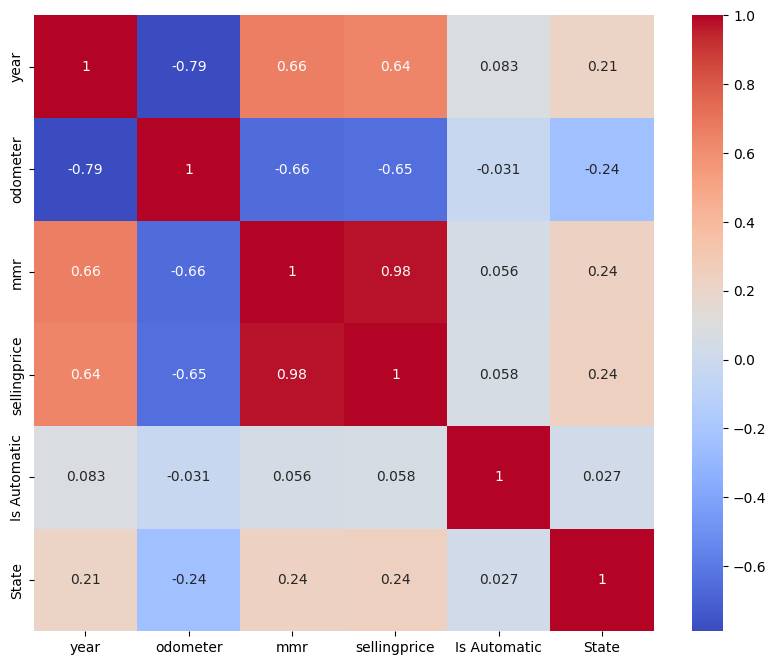

In [171]:
df_corr = df.drop(columns=['Make']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

#MODEL IMPLEMENTATION

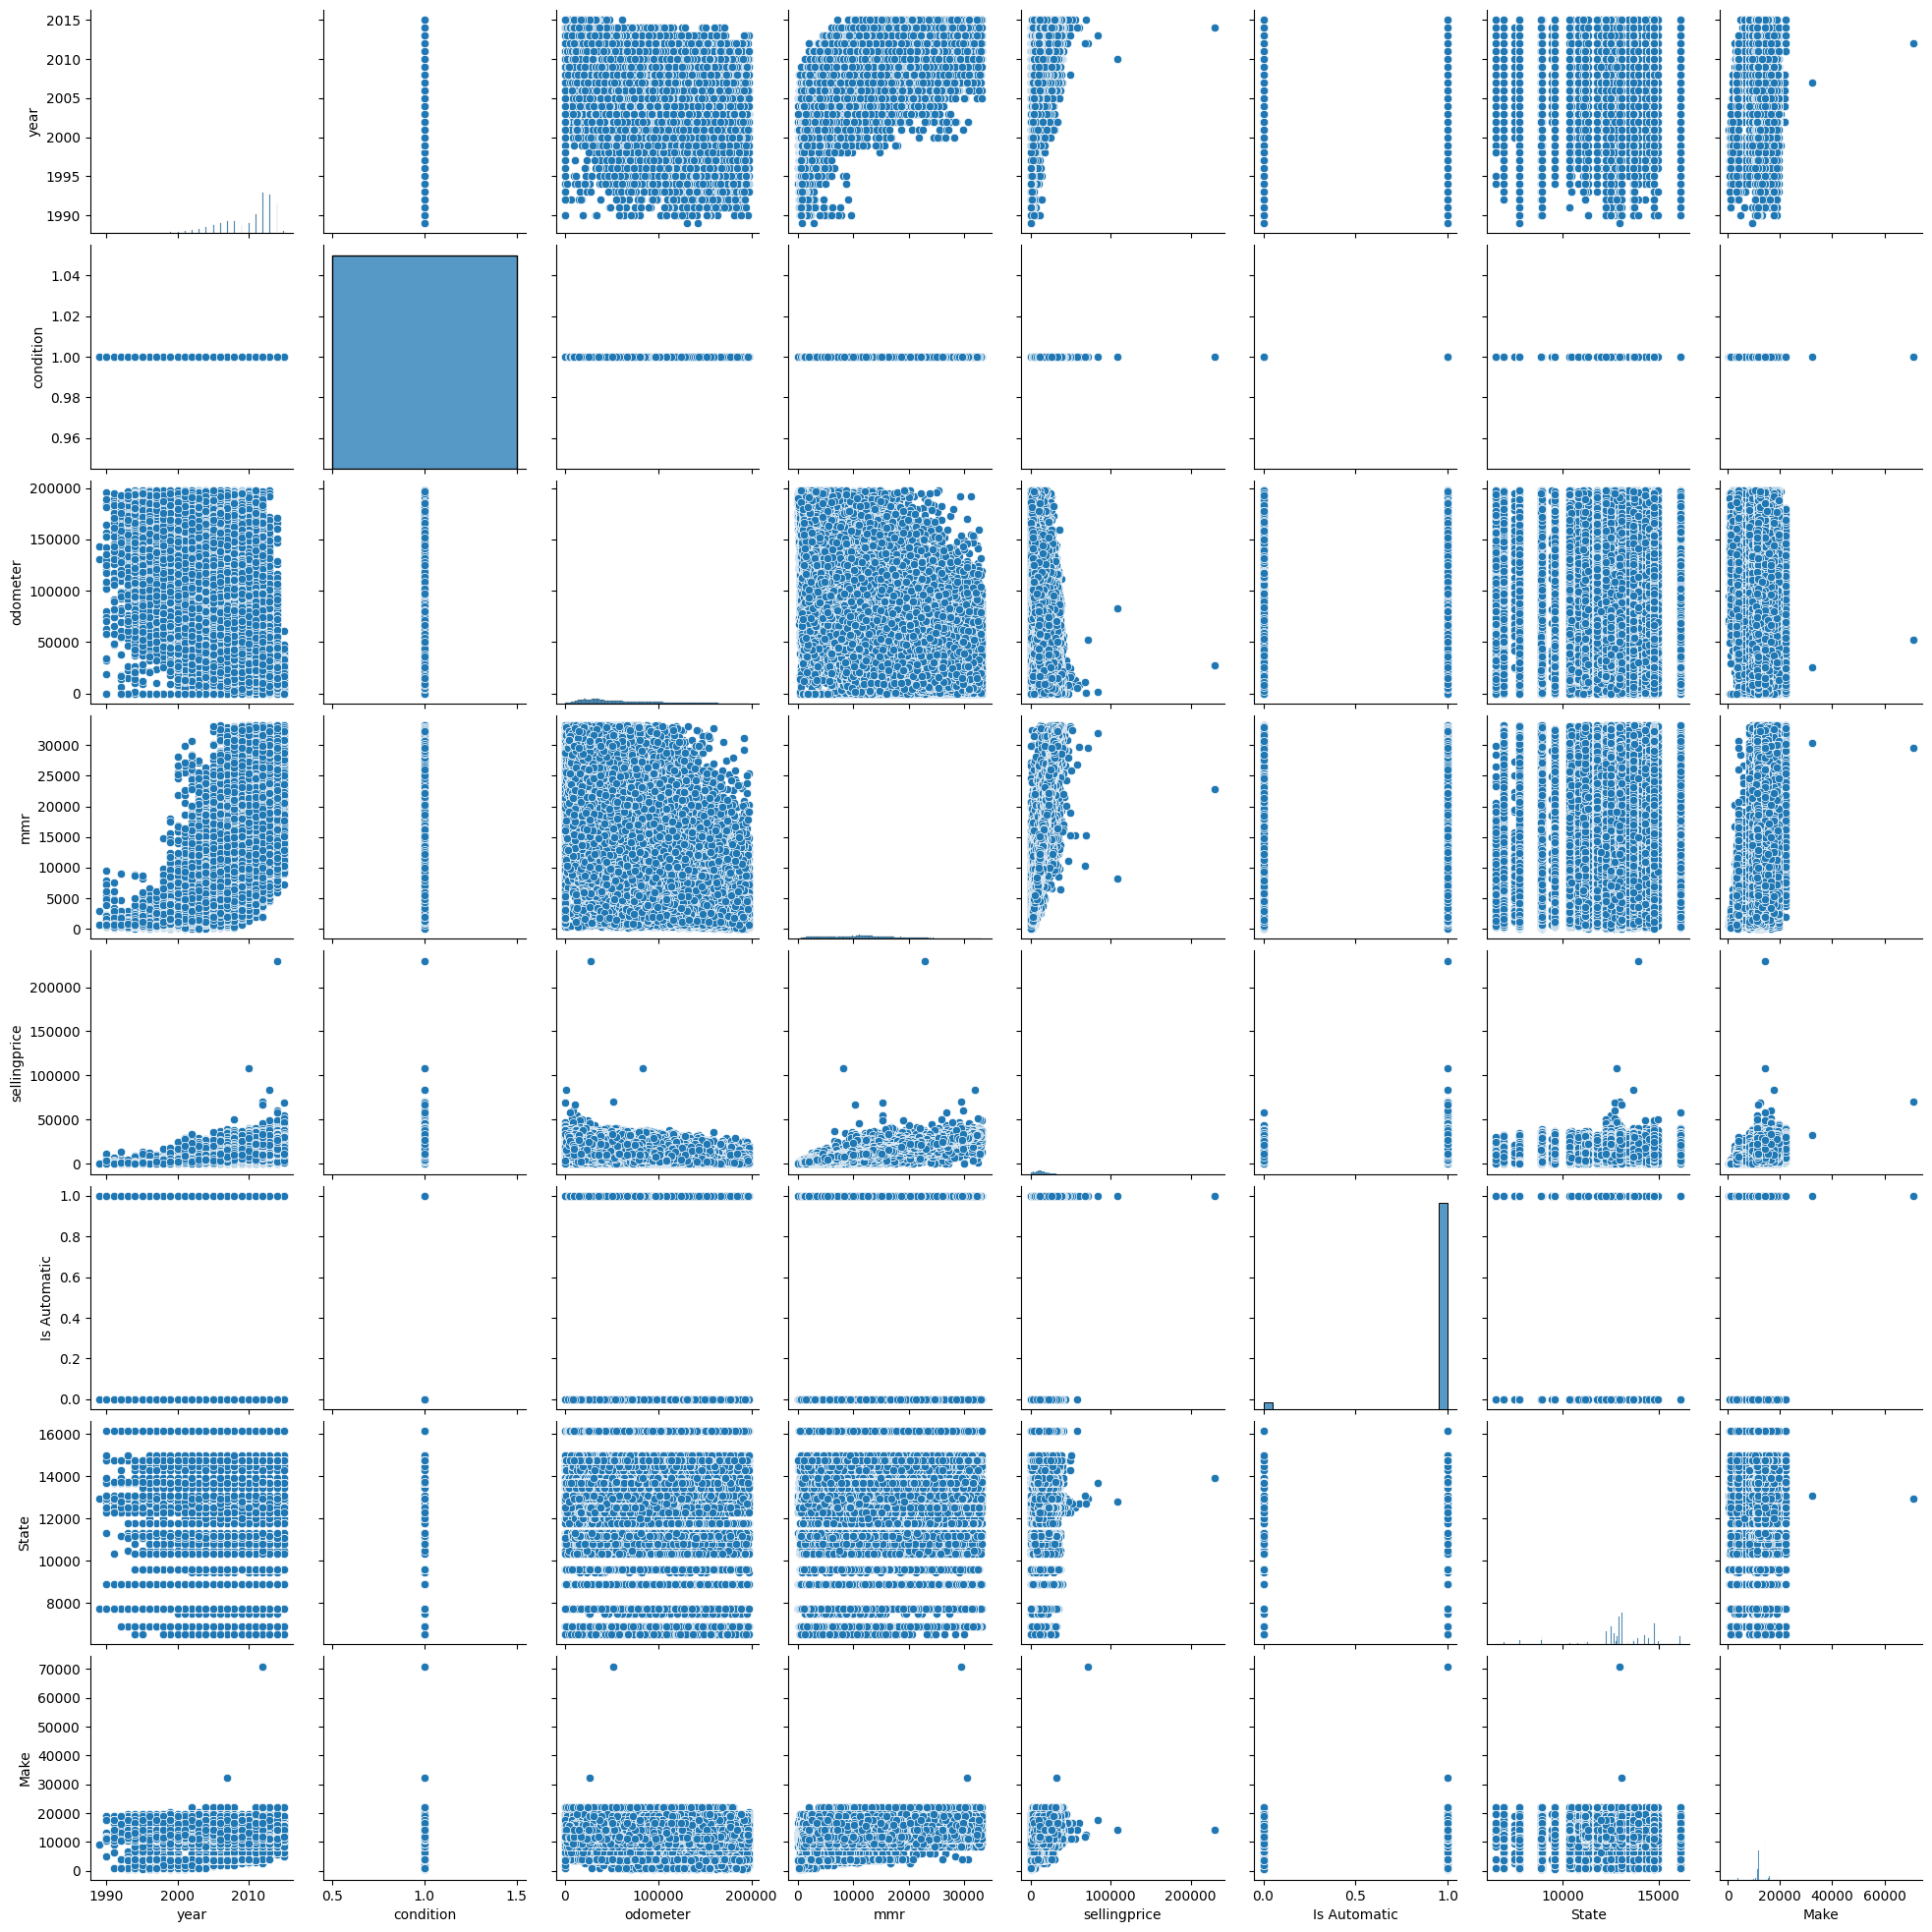

In [68]:
sns.pairplot(df)

In [69]:
df.head()

,year,condition,odometer,mmr,sellingprice,Is Automatic,State,Make
0,2015,1,16639.0,20500.0,21500.0,1.0,12943.67835,11781.281188
1,2015,1,9393.0,20800.0,21500.0,1.0,12943.67835,11781.281188
2,2014,1,1331.0,31900.0,30000.0,1.0,12943.67835,16439.040206
3,2015,1,14282.0,27500.0,27750.0,1.0,12943.67835,11761.163939
4,2015,1,5554.0,15350.0,10900.0,1.0,12943.67835,11791.637624


In [70]:
X = df[['year', 'mmr', 'odometer', 'Is Automatic', 'Make']]
y = df['sellingprice']

#Modelling


"""
MODELS USED:

    1 LINEAR REGRESSION
    2 RIDGE REGRESSION
    3 LASSO REGRESSION
    4 ELASTICNET REGRESSION
"""

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

In [74]:
predictions = lrmodel.predict(X_test)

In [75]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')


Root Mean Squared Error: 1714.7794055820018
R^2 Score: 0.9481884318838504
[ 3040.57318035 10087.28957727 12645.88196654 ... 13810.60673313
  9434.78177049  6474.20942916]


In [76]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
comparison_df.head()

         Actual     Predicted
120812   3300.0   3040.573180
507058  10000.0  10087.289577
190478  12000.0  12645.881967
125751   7600.0   7729.215994
187896   5600.0   7869.106033
...         ...           ...
116797  26800.0  24120.099688
340206  11500.0  10823.525335
220927  14400.0  13810.606733
2438    10300.0   9434.781770
487051   5000.0   6474.209429

[152373 rows x 2 columns]


,Actual,Predicted
120812,3300.0,3040.573180
507058,10000.0,10087.289577
190478,12000.0,12645.881967
125751,7600.0,7729.215994
187896,5600.0,7869.106033


In [77]:
#coefficent : if increase in one feature then there is 0.82872299 increase in target feature provided all the other factors remains the same.
lrmodel.coef_

array([-2.56916450e+01,  9.88816320e-01, -2.86355685e-03,  2.07163654e+02,
        1.05419494e-02])

In [78]:
#Intercept : When the all the features are zero the target feature will still have a min value
lrmodel.intercept_

51486.02540723062

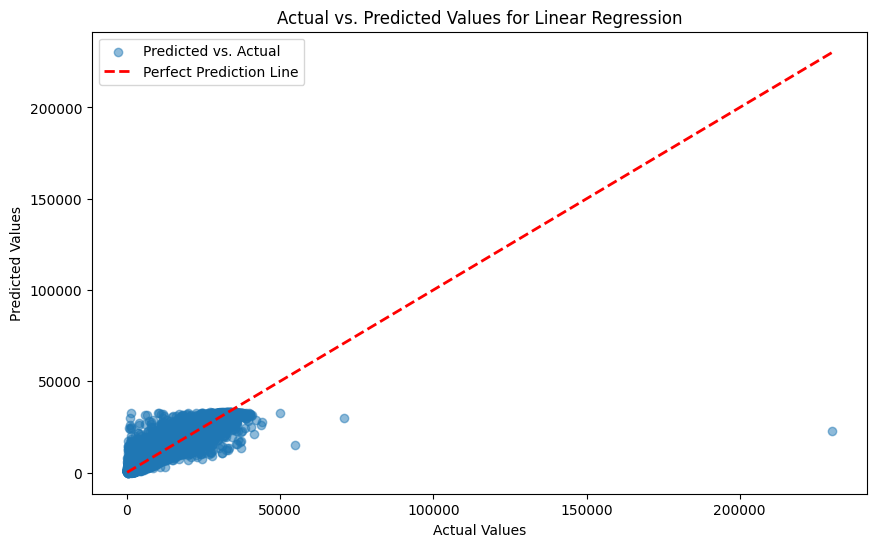

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')  # Line of perfect predictions
plt.legend()
plt.show()

#RIDGE REGRESSION

In [80]:
ridge_model = Ridge(alpha=100.0)
ridge_model.fit(X_train, y_train)

Ridge(alpha=100.0)

In [81]:
ridge_predictions = ridge_model.predict(X_test)


In [82]:
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f'Root Mean Squared Error: {ridge_rmse}')
print(f'R^2 Score: {ridge_r2}')


Root Mean Squared Error: 1714.7785455668773
R^2 Score: 0.9481884838540582


In [83]:
ridge_model.intercept_

51457.06405225235

In [84]:
ridge_model.coef_

array([-2.56763551e+01,  9.88816205e-01, -2.86277473e-03,  2.05216641e+02,
        1.05468924e-02])

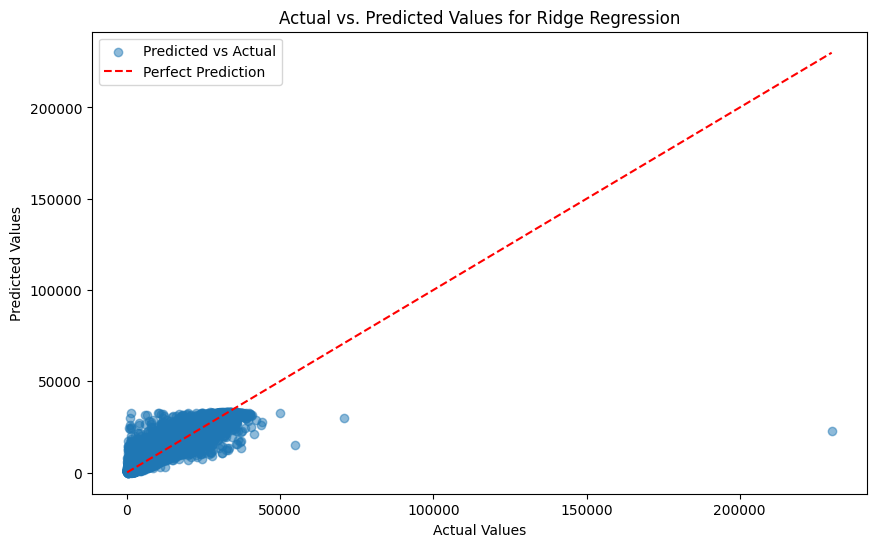

In [85]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, ridge_predictions, alpha=0.5, label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Ridge Regression')
plt.legend()
plt.show()

#LASSO REGRESSION

In [86]:
lasso = Lasso()

In [87]:
#trying different alphas for lasso
param_grid = {
    'alpha' : [0.0001,0.001,0.01,0.1,1,10,100,1000]
}

In [88]:
lasso_cv = GridSearchCV(lasso, param_grid, cv = 3, n_jobs= -1)

In [89]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [90]:
y_pred2 = lasso_cv.predict(X_test)

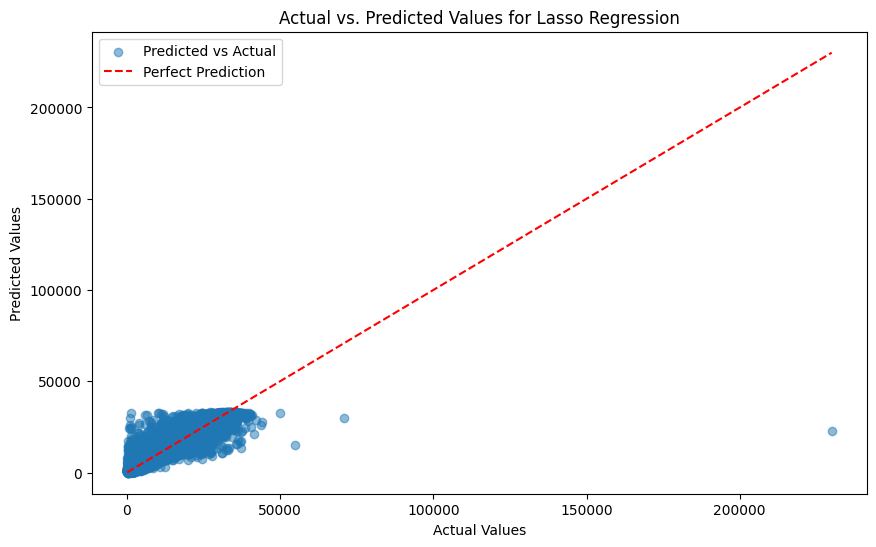

In [91]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred2, alpha=0.5, label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Lasso Regression')
plt.legend()
plt.show()

In [92]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred2))

r2_lasso = r2_score(y_test, y_pred2)

print(f'Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'R-squared (R^2): {r2_lasso}')

Root Mean Squared Error (RMSE): 1714.7792530866047
R-squared (R^2): 0.9481884410990594


In [93]:
lasso_cv.best_estimator_.coef_

array([-2.56871427e+01,  9.88816008e-01, -2.86333094e-03,  2.06824254e+02,
        1.05430694e-02])

In [94]:
lasso_cv.best_estimator_.intercept_

51477.27886786229

#ELASTIC NET

In [95]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [96]:
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [97]:
y_predict_en = elastic_net.predict(X_test)

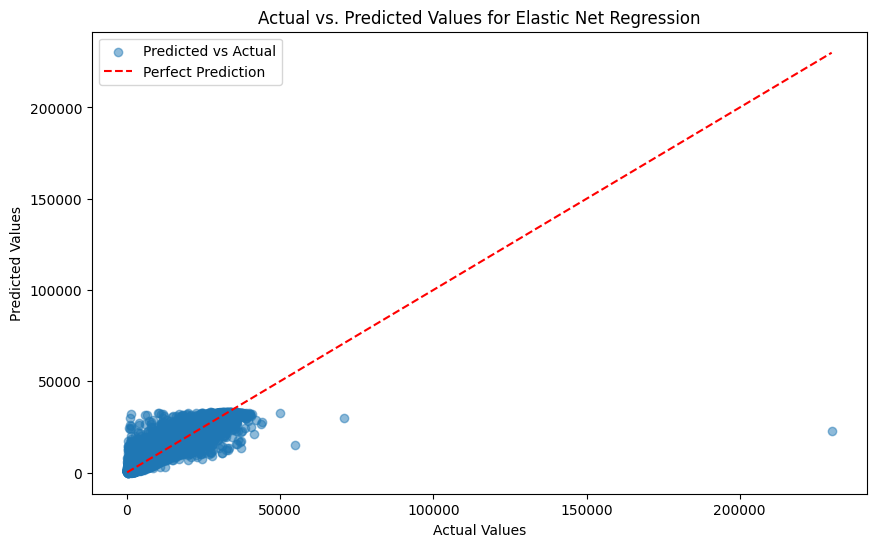

In [98]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_predict_en, alpha=0.5, label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Elastic Net Regression')
plt.legend()
plt.show()

In [99]:
EN_mse = mean_squared_error(y_test, y_predict_en)
EN_rmse = np.sqrt(EN_mse)
EN_r2 = r2_score(y_test, y_predict_en)
print(f'Root Mean Squared Error: {EN_rmse}')
print(f'R^2 Score: {EN_r2}')

Root Mean Squared Error: 1714.8674881590812
R^2 Score: 0.9481831089675168


In [100]:
elastic_net.coef_

array([-2.44986508e+01,  9.88782162e-01, -2.80293530e-03,  7.64124386e+01,
        1.08974234e-02])

In [101]:
elastic_net.intercept_

49206.550981956956

In [102]:
X_test

,year,mmr,odometer,Is Automatic,Make
120812,2003,3225.0,178877.0,1.0,12430.423511
507058,2011,10200.0,54816.0,1.0,12430.423511
190478,2013,12850.0,64630.0,1.0,14110.888658
125751,2007,8025.0,105543.0,0.0,16439.040206
187896,2009,8000.0,87702.0,1.0,12430.423511
...,...,...,...,...,...
116797,2011,24400.0,57743.0,1.0,12430.423511
340206,2013,10950.0,34359.0,1.0,11237.762228
220927,2013,13900.0,8825.0,1.0,10948.934658
2438,2010,9475.0,41304.0,1.0,12430.423511


In [103]:
df.to_csv('car_sale_prediction.csv', index=False)

#TESTING

In [104]:
#X = df[['year', 'mmr', 'odometer', 'Is Automatic']]
#y = df['sellingprice']

In [124]:
#Testing
new_data = np.array([[2024, 12000, 15000, 1, 16439.04020624885]])  

predicted_price = elastic_net.predict(new_data)

print(f'Predicted Selling Price: {predicted_price[0]}')


Predicted Selling Price: 11700.179398700639


c:\Users\YEP!\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


#Saving the models in pickle format

In [133]:
with open('Car_Sale_Price_Prediction_Linear_Regression.pkl', 'wb') as file:
    pickle.dump(lrmodel, file)




In [130]:
with open('Car_Sale_Price_Prediction_Elastic_Net.pkl', 'wb') as file:
    pickle.dump(elastic_net, file)


In [129]:
with open('Car_Sale_Price_Prediction_Lasso_Regression.pkl', 'wb') as file:
    pickle.dump(lasso_cv, file)


In [132]:
with open('Car_Sale_Price_Prediction_Ridge_Regression.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)

